In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
from keras.layers import Input,Dense,Conv2D,MaxPooling2D, UpSampling2D
import glob as glob
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import keras
from keras.layers import BatchNormalization, Activation
from keras.layers.advanced_activations import LeakyReLU
from keras.layers.convolutional import UpSampling2D, Conv2D
from keras.models import Sequential, Model
from keras.optimizers import Adam
from skimage.transform import resize

import os
from sklearn.model_selection import train_test_split
from skimage import transform
import sys
import math

Using TensorFlow backend.


In [0]:
!cd "/content/drive/My Drive/Colab Notebooks" 

In [0]:
file_path = "/content/drive/My Drive/Colab Notebooks/faces94" 
image_paths = glob.glob(file_path+'/*/*/*.jp*g')

In [0]:
latent_vector = 100
image_transform = (128, 128, 3)
input_size = np.prod(image_transform)
image_vector = np.empty((len(image_paths),input_size))

In [7]:
Labels = []
images = np.empty((len(image_paths), *image_transform))
for i in range(len(image_paths)3):
    img = plt.imread(image_paths[i])
    transformed_img = resize(img,output_shape=image_transform )
    images[i] = transformed_img
    Labels.append(image_paths[i].split('/')[6])
    image_vector[i] = transformed_img.reshape((input_size))

/usr/local/lib/python3.6/dist-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/usr/local/lib/python3.6/dist-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


In [8]:
print(image_vector.shape)

(3059, 49152)


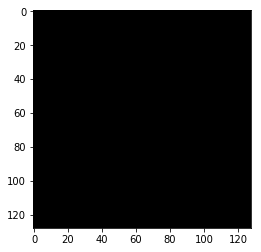

In [9]:
plt.imshow(images[np.random.randint(len(image_paths))])

In [0]:
X_train, X_test, y_train, y_test = train_test_split(image_vector, image_vector, test_size=0.3, random_state=42)
input_image=Input((input_size, ))

In [0]:
def AutoEncoder(input_image,latent_vector):
  encode=keras.layers.Dense(latent_vector*8, activation='relu')(input_image)
  encode=keras.layers.Dense(latent_vector*4, activation='relu')(encode)
  encode=keras.layers.Dense(latent_vector*2, activation='relu')(encode)
  encode=keras.layers.Dense(latent_vector, activation='relu')(encode)

  decode=keras.layers.Dense(latent_vector*2, activation='relu')(encode)
  decode=keras.layers.Dense(latent_vector*4, activation='relu')(encode)
  decode=keras.layers.Dense(latent_vector*8, activation='relu')(decode)
  decode=keras.layers.Dense(input_size, activation='sigmoid')(decode)
  autoencoder = Model(input_image,decode)
  autoencoder.summary()
  
  encoder = Model(input_image,encode)
  encoder.summary()
  return autoencoder,encoder

In [12]:
AE,encoder = AutoEncoder(input_image,latent_vector)


Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 49152)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 800)               39322400  
_________________________________________________________________
dense_2 (Dense)              (None, 400)               320400    
_________________________________________________________________
dense_3 (Dense)              (None, 200)               80200     
_________________________________________________________________
dense_4 (Dense)              (None, 100)               20100     
_________________________________________________________________
dense_6 (Dense)              (None, 400)               40400     
_________________________________________________________________
dens

In [0]:
AE.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [14]:
AE.fit(X_train, y_train, batch_size=128, epochs=100, validation_data=[X_test, y_test], shuffle=True)

Instructions for updating:
Use tf.cast instead.
Train on 2141 samples, validate on 918 samples
Epoch 1/100
2141/2141 [==============================] - 9s 4ms/step - loss: 0.6706 - acc: 0.6453 - val_loss: 0.6516 - val_acc: 0.6261
Epoch 2/100
2141/2141 [==============================] - 4s 2ms/step - loss: 0.6143 - acc: 0.6415 - val_loss: 0.4190 - val_acc: 0.6283
Epoch 3/100
2141/2141 [==============================] - 4s 2ms/step - loss: 0.2408 - acc: 0.6473 - val_loss: 0.2319 - val_acc: 0.6296
Epoch 4/100
2141/2141 [==============================] - 4s 2ms/step - loss: 0.2155 - acc: 0.6481 - val_loss: 0.2236 - val_acc: 0.6298
Epoch 5/100
2141/2141 [==============================] - 4s 2ms/step - loss: 0.2126 - acc: 0.6481 - val_loss: 0.2217 - val_acc: 0.6298
Epoch 6/100
2141/2141 [==============================] - 4s 2ms/step - loss: 0.2096 - acc: 0.6480 - val_loss: 0.2182 - val_acc: 0.6295
Epoch 7/100
2141/2141 [==============================] - 4s 2ms/step - loss: 0.2053 - acc: 0.64

In [0]:
decoded_imgs = AE.predict(X_test)

In [0]:
encoded_imgs=encoder.predict(X_test)

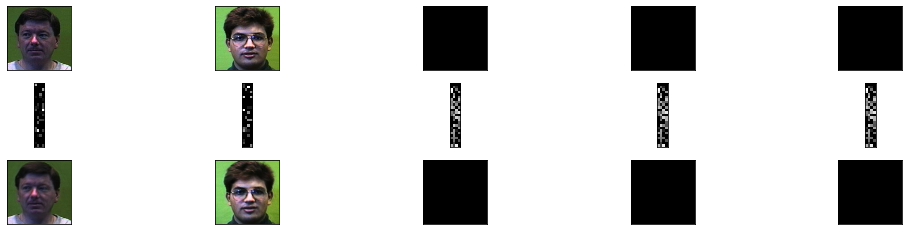

In [17]:
num_images = 5
np.random.seed(42)

def plot_reconstructed_image(i,image_idx,num_images,X_test,encoded_imgs,decoded_imgs):
  ax = plt.subplot(3, num_images, i + 1)
  plt.imshow(X_test[image_idx].reshape(128, 128, 3))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # plot encoded image
  ax = plt.subplot(3, num_images, num_images + i + 1)
  plt.imshow(encoded_imgs[image_idx].reshape(25, 4))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # plot reconstructed image
  ax = plt.subplot(3, num_images, 2*num_images + i + 1)
  plt.imshow(decoded_imgs[image_idx].reshape(128, 128, 3))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

index = np.random.randint(X_test.shape[0], size=num_images)
encoded_imgs = encoder.predict(X_test)
decoded_imgs = AE.predict(X_test)

plt.figure(figsize=(18, 4))

for i, image_idx in enumerate(index):
    # plot original image
    plot_reconstructed_image(i,image_idx,num_images,X_test,encoded_imgs,decoded_imgs)
plt.show()

In [0]:
import pandas as pd
filename = "latent_space.csv" 
data_frame=pd.DataFrame(data=encoded_imgs)
data_frame['Labels']=Labels
data_frame.to_csv('/content/drive/My Drive/Colab Notebooks/Autoencoder/encoded_images.csv', sep='\t', encoding='utf-8')